In [65]:
# Import the required external modules
import matplotlib.pyplot as plt
import numpy as np

# Import the loadImage() function from the microImage module
import microImage as mim

## 1 - How to use the functions on arrays

In this first part, we will see how to use the different functions in the module without using the ImageStack class but arrays instead. This will keep the output of the module versatile.

### Open an image on the computer and extract it as an array

In [5]:
# Select the file or folder to load with microImage
#path = "/path/to/file/test_image.tif"
path = '/Users/vivienwalter/Documents/PROGRAMMATION/test_items/test_iscat'

# Load the image using microImage into a numpy array
imageArray = mim.openImage(path)

/Users/vivienwalter/Documents/PROGRAMMATION/Git/vwalter/test_microImg/dev_microImage/test1/lib/python3.8/site-packages/PIMS-0.4.1-py3.8.egg/pims/image_sequence.py:150: UserWarning: Loading ALL files in this directory. To ignore extraneous files, use a pattern like 'path/to/images/*.png'
  warn("Loading ALL files in this directory. To ignore extraneous "


In [6]:
# Display the shape of the array and the array itself
print(imageArray.shape)

imageArray

(50, 1024, 1024)


array([[[32932, 32932, 32932, ..., 32932, 32932, 32932],
        [32932, 32932, 32932, ..., 32932, 32932, 32932],
        [32932, 32956, 32932, ..., 32932, 32932, 32932],
        ...,
        [32932, 32932, 32941, ..., 32932, 32932, 32932],
        [32932, 32932, 32932, ..., 32932, 32932, 32932],
        [33023, 32768, 32938, ..., 32768, 32768, 32768]],

       [[32932, 32932, 32932, ..., 32932, 32932, 32932],
        [32932, 32932, 32932, ..., 32932, 32932, 32932],
        [32932, 32955, 32932, ..., 32932, 32932, 32932],
        ...,
        [32932, 32932, 32932, ..., 32932, 32932, 32932],
        [32932, 32932, 32932, ..., 32932, 32932, 32932],
        [33023, 32768, 32938, ..., 32768, 32768, 32768]],

       [[32932, 32932, 32932, ..., 32932, 32932, 32932],
        [32932, 32932, 32932, ..., 32932, 32932, 32932],
        [32932, 32945, 32932, ..., 32932, 32932, 32932],
        ...,
        [32932, 32932, 32932, ..., 32932, 32932, 32932],
        [32932, 32932, 32932, ..., 32932, 329

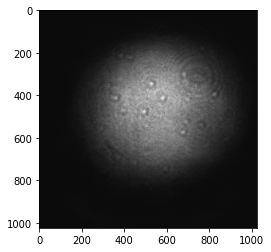

In [7]:
# Select and show the first frame of the array using matplotlib functions
frame1 = imageArray[0]

plt.imshow(frame1, cmap='gray')

### Correct the background and the contrast of the image

In [8]:
# Apply the background correction on the image, using a median reference image and correcting for signed bits
correctedArray = mim.backgroundCorrection(imageArray, signed_bits=True, average='median')

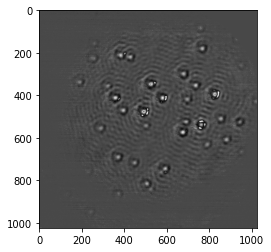

In [106]:
# Apply a contrast correction on the image, using auto guess based on percentiles
contrastedArray = mim.contrastCorrection(correctedArray, percentile=0.01, percentile_min= 0.1, rescale=True)

# Select and show the first frame
contrastedFrame1 = contrastedArray[0]
plt.imshow(contrastedFrame1, cmap='gray')

### Crop the image and save the stack in a file

In [12]:
# Crop the image between the points (200,200) and (800,800)
croppedArray = mim.cropImage(contrastedArray, top_left=(200,200), bottom_right=(800,800))

In [13]:
# Save the whole stack as a gif animation
mim.saveImage(croppedArray, 'test.gif', bit_depth=8, rescale=True)

## 2 - Using the ImageStack class

In the second part, we will see how to use the ImageStack class built within the module to make the image handling easier.

### Open an image as a class object and display it

In [31]:
# Load the image in the class into an ImageStack object
image = mim.loadImage(path)

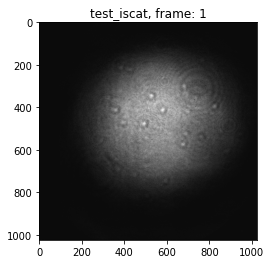

In [32]:
image.show()

### Correct the background and contrast of the image

In [69]:
# Apply the background correction
image.backgroundCorrection(signed_bits=True, average='median')

In [105]:
# Analyse the array manually
print('Min:', np.amin(image.frame.raw))
print('Percentile (.1):', np.percentile(image.frame.raw, .1))
print('Max:', np.amax(image.frame.raw))
print('Percentile (99.99):', np.percentile(image.frame.raw, 99.99))

Min: 1
Percentile (.5): 611.0
Max: 65535
Percentile (99.99): 1126.0


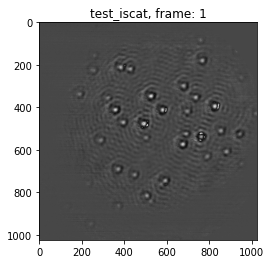

In [99]:
# Apply a contrast correction on the image, this time inputing the values manually
image.contrastCorrection(min=600, max = 1200)
image.show()

### Duplicate and crop the object before generating a substack

In [107]:
# Duplicate the array to avoid making mistakes
image2 = image.duplicate()

In [108]:
# Crop the image between the points (200,200) and (800,800)
image2.crop(top_left=(200,200), bottom_right=(800,800))

In [109]:
# Generate a substack with only frames from 10 to 19
image2.reducedRange(first=10, last=19)

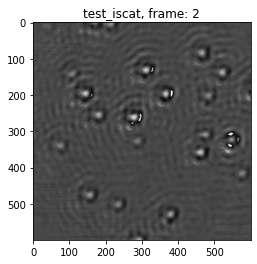

In [111]:
# Show the 2nd frame of the new substack
image2.setFrame(1)
image2.show()

### Save the displayed frame as well as the whole substack

In [112]:
# Save the displayed frame in a file
image.saveFrame('test_frame.png', bit_depth=16, rescale=True)

In [114]:
# Save the raw substack as a tif stack
image.saveStack('test_stack.tif', bit_depth=16, rescale=False, save_raw=True)